# Figure 4

## a

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from flyvis import EnsembleView
from flyvis.analysis.visualization import plots
from flyvis.analysis.moving_bar_responses import plot_angular_tuning

In [2]:
ensemble = EnsembleView(
    "flow/0000",
    best_checkpoint_fn_kwargs={
        "validation_subdir": "validation",
        "loss_file_name": "loss",
    },
)

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2025-07-18 17:29:55] ensemble:166 Loaded 50 networks.


In [3]:
stims_and_resps = ensemble.moving_edge_responses()

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f5f7ab0e86eec6a74f7c7348ff271874/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e4bde032c338b1cd29735e20d7295560/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/205d5ca11f565fb4051fa31c35611447/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5c6c920ba6d8823e0ecde6bebde9038d/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6dff21380290115f37d551ec4e3fb63c/output.h5


[2025-07-18 17:30:00] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d7909da0cdbf3050799ab79998b5e652/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6896e4fbc89a7b64007ce5a247c4daf0/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/007/__cache__/flyvis/analysis/stimulus_responses/compute_responses/275610a4c243f70005232b6ffc2849c8/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/008/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ed63bcbabc495d4af089a3e42c030ce4/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/009/__cache__/flyvis/analysis/stimulus_responses/compute_responses/1b2d0e2b0be4bf6f96ace5d614984e3c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/010/__cache__/flyvis/analysis/stimulus_responses

In [4]:
stims_and_resps['responses'] /= (norm := ensemble.responses_norm(rectified=True))

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec002177245ed30fe68c68017bbc5281/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f3550b17c98a072ee24344e7d80a9dff/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/78cf6416086eca223c20eb5bd33f9baa/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cc0d06353e19b7a29c816236472dd532/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7a84d2a060949a51ac30f04b78a200cb/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses

In [5]:
# retrieve cluster indices for averaging across best clusters
cell_types = [
    "L1",
    "L2",
    "L3",
    "L4",
    "L5",
    "Mi1",
    "Tm3",
    "Mi4",
    "Mi9",
    "CT1(M10)",
    "T4a",
    "T4b",
    "T4c",
    "T4d",
    "T5a",
    "T5b",
    "T5c",
    "T5d",
    "Tm1",
    "Tm2",
    "Tm4",
    "Tm9",
    "CT1(Lo1)",
    "TmY3",
]
cluster_indices = {}
for cell_type in cell_types:
    if cell_type not in cluster_indices:
        cluster_indices[cell_type] = ensemble.cluster_indices(cell_type)

/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator GaussianMixture from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[2025-07-18 17:30:11] clustering:835 Loaded L1 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/

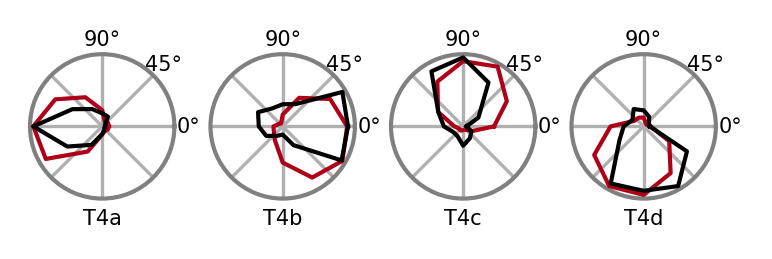

In [6]:
# plot the tuning across the best clusters
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T4a", "T4b", "T4c", "T4d"]):
    plot_angular_tuning(
        stims_and_resps.sel(network_id=cluster_indices[cell_type][0]),
        cell_type=cell_type,
        intensity=1,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        groundtruth_linewidth=1.0,
        average_models=True,
        model_dim=2,
        zorder=100,
    )
    axes[i].set_xlabel(cell_type)

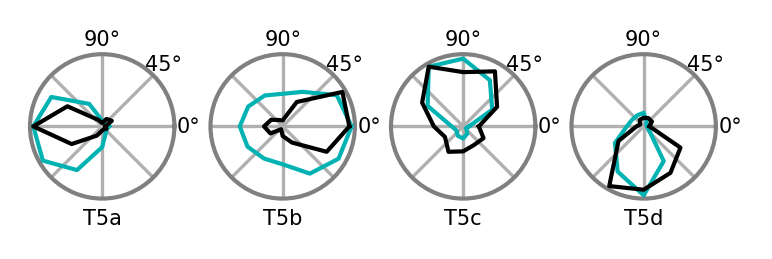

In [7]:
fig, axes, _ = plots.plt_utils.get_axis_grid(
    range(4),
    projection="polar",
    aspect_ratio=4,
    figsize=[2.95, 0.83],
    wspace=0.25,
)
for i, cell_type in enumerate(["T5a", "T5b", "T5c", "T5d"]):
    plot_angular_tuning(
        stims_and_resps.sel(network_id=cluster_indices[cell_type][0]),
        cell_type=cell_type,
        intensity=0,
        fig=fig,
        ax=axes[i],
        groundtruth=True,
        groundtruth_linewidth=1.0,
        average_models=True,
        model_dim=2,
        zorder=100,
    )
    axes[i].set_xlabel(cell_type)

## b

In [8]:
from datamate import namespacify

from flyvis.analysis.moving_edge_currents import CellTypeArray, MovingEdgeCurrentView
from flyvis.datasets import MovingEdge

In [9]:
target_types = ["T4c"]

In [10]:
experiment_data = ensemble.moving_edge_currents()

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/ab88142ab4c97bf6817283ee1cbc3069/output.h5


[2025-07-18 17:30:23] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/114b5ff2800c39fd72c9cab366884d09/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/5f88dc8aa54e6f4b774b2008d1acd70e/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/07cb652410a1c74aa4b46b68cecfe8b7/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/97a4efda83d24520bfd20206a8ef30a8/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/366a339f09cf2b28856526c86ac3de41/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/006/__ca

[2025-07-18 17:30:27] chkpt_utils:36 Recovered network state.
[2025-07-18 17:30:31] network:842 Computing 12 stimulus responses.


In [11]:
dataset = MovingEdge(**experiment_data[0].config)

In [12]:
current_views = {}

In [13]:
norm = CellTypeArray(ensemble.responses_norm(rectified=False), ensemble[0].connectome)

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec002177245ed30fe68c68017bbc5281/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f3550b17c98a072ee24344e7d80a9dff/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/78cf6416086eca223c20eb5bd33f9baa/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cc0d06353e19b7a29c816236472dd532/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7a84d2a060949a51ac30f04b78a200cb/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses

In [14]:
for target_type in target_types:
    if target_type not in current_views:
        current_views[target_type] = MovingEdgeCurrentView(
            ensemble, target_type, experiment_data, dataset.arg_df
        )
    view = current_views[target_type]

In [15]:
for target_type in target_types:
    current_views[target_type] = view.divide_by_given_norm(norm)

In [16]:
cell_type = "T4c"
current_view = current_views[cell_type]

Text(0.5, 0, 'time (s)')

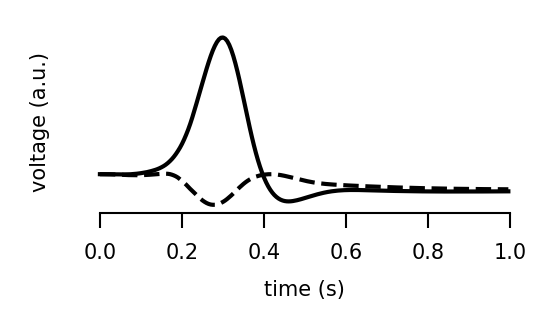

In [17]:
fig, ax = current_view.model_selection(cluster_indices[cell_type][0]).plot_response(
    1, 90, t_end=1.0
)
xlim_responses = ax.get_xlim()
ax.set_ylabel("voltage (a.u.)", fontsize=5)
ax.set_xlabel("time (s)", fontsize=5)

Text(0, 0.5, 'current (a.u.)')

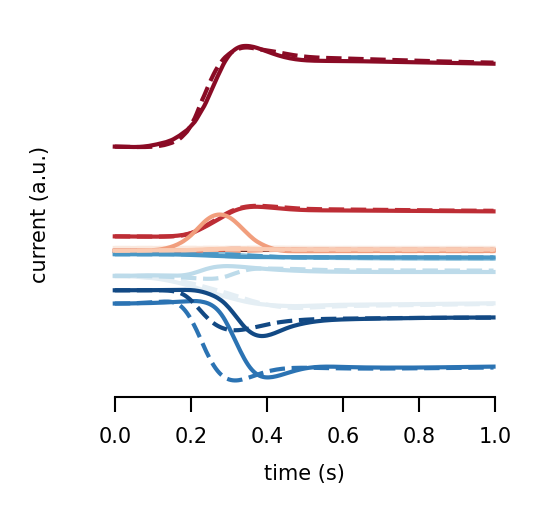

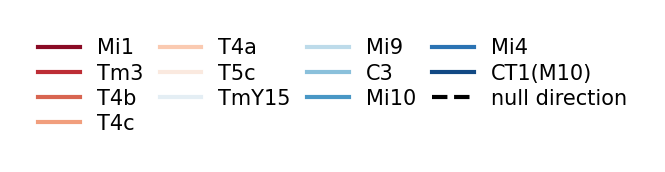

In [18]:
fig, ax, legend_fig, legend_ax = current_view.model_selection(
    cluster_indices[cell_type][0]
).plot_temporal_contributions(
    1,
    90,
    t_start=0,
    t_end=1,
    model_average=True,
    legend=False,
    sum_exc_inh=False,
    only_sum=False,
    max_figure_height_cm=3.3941,
    panel_height_cm=3.3941,
    max_figure_width_cm=4.0513,
    panel_width_cm=4.0513,
    hide_source_types=None,
)
ylim = ax.get_ylim()
ax.set_ylabel("current (a.u.)", fontsize=5)

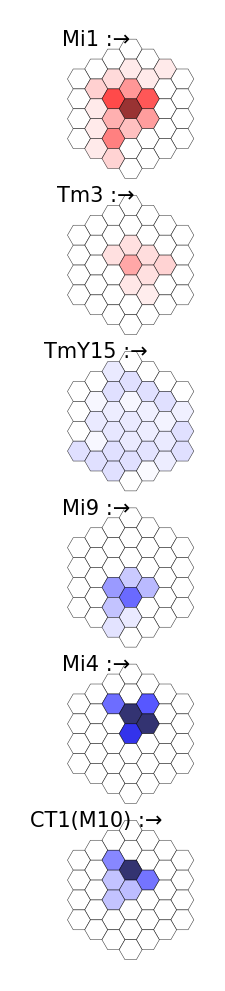

In [19]:
fig, ax, _ = current_view.model_selection(
    cluster_indices[cell_type][0]
).plot_spatial_contribution_grid(
    t_start=0,
    t_end=1,
)

## d

In [20]:
from flyvis.utils.color_utils import flash_response_color_labels
from flyvis.analysis.visualization.figsize_utils import fit_panel_size
from scipy.signal import find_peaks
from flyvis.utils.hex_utils import hex_rows
from flyvis.analysis.visualization import plt_utils, plots
from flyvis.analysis.visualization.plots import plot_strf
from flyvis.datasets.dots import SpatialImpulses

In [21]:
norm = ensemble.responses_norm()

In [22]:
flashes_and_resps = ensemble.spatial_impulses_responses()
flashes_and_resps['responses'] = flashes_and_resps['responses'] / norm

[2025-07-18 17:31:00] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2025-07-18 17:31:00] chkpt_utils:36 Recovered network state.
[2025-07-18 17:31:01] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:31:20] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c2155067d3a2827f245706e3f7f1f665/output.h5
[2025-07-18 17:31:20] chkpt_utils:36 Recovered network state.
[2025-07-18 17:31:20] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:31:38] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/bd5ebba529478feb7623172433ec481a/output.h5
[2025-07-18 17:31:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:31:39] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:31:57] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/9ef2c4fa9dfaf07f9439d79b335407d1/output.h5
[2025-07-18 17:31:58] chkpt_utils:36 Recovered network state.
[2025-07-18 17:31:58] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:32:16] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ff60430d1777fb562865f938e16d723f/output.h5
[2025-07-18 17:32:16] chkpt_utils:36 Recovered network state.
[2025-07-18 17:32:17] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:32:35] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/df7dcce41fc1cbb38c87471031f8273d/output.h5
[2025-07-18 17:32:36] chkpt_utils:36 Recovered network state.
[2025-07-18 17:32:36] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:32:57] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses/compute_responses/36933a0ad6cc135969752c26159cb6cc/output.h5
[2025-07-18 17:32:57] chkpt_utils:36 Recovered network state.
[2025-07-18 17:32:58] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:33:18] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/af88e82e1981902571a23b00900ae08f/output.h5
[2025-07-18 17:33:19] chkpt_utils:36 Recovered network state.
[2025-07-18 17:33:19] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:33:44] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/007/__cache__/flyvis/analysis/stimulus_responses/compute_responses/951ec0694097a3b187f66bff9d585207/output.h5
[2025-07-18 17:33:44] chkpt_utils:36 Recovered network state.
[2025-07-18 17:33:45] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:34:06] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/008/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c136c4a24a7050a3cb92d2f1248527c0/output.h5
[2025-07-18 17:34:07] chkpt_utils:36 Recovered network state.
[2025-07-18 17:34:08] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:34:29] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/009/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f1467d301576fc55cf8e933335ed97d9/output.h5
[2025-07-18 17:34:29] chkpt_utils:36 Recovered network state.
[2025-07-18 17:34:30] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:34:53] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/010/__cache__/flyvis/analysis/stimulus_responses/compute_responses/fa1a9c0b1ae6d6794d9f3e3df31d7284/output.h5
[2025-07-18 17:34:53] chkpt_utils:36 Recovered network state.
[2025-07-18 17:34:54] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:35:16] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/011/__cache__/flyvis/analysis/stimulus_responses/compute_responses/805f780f01f217111b8ab27276e00041/output.h5
[2025-07-18 17:35:17] chkpt_utils:36 Recovered network state.
[2025-07-18 17:35:17] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:35:38] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/012/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3ec19bf2778378fdd049e78cd1aa16e2/output.h5
[2025-07-18 17:35:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:35:39] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:36:02] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/013/__cache__/flyvis/analysis/stimulus_responses/compute_responses/14f88bd47d8b2dcc025ac31400273b1a/output.h5
[2025-07-18 17:36:02] chkpt_utils:36 Recovered network state.
[2025-07-18 17:36:03] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:36:29] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/014/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d4d5a47ffe5d22a6049d7c594761e6d4/output.h5
[2025-07-18 17:36:29] chkpt_utils:36 Recovered network state.
[2025-07-18 17:36:30] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:36:58] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/015/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f9fd95ff144441badcb41d93909b63b7/output.h5
[2025-07-18 17:36:59] chkpt_utils:36 Recovered network state.
[2025-07-18 17:36:59] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:37:28] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/016/__cache__/flyvis/analysis/stimulus_responses/compute_responses/afc7eccc12dbee70f7c25234612381bf/output.h5
[2025-07-18 17:37:28] chkpt_utils:36 Recovered network state.
[2025-07-18 17:37:29] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:37:49] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/017/__cache__/flyvis/analysis/stimulus_responses/compute_responses/960af476550dc936ae1480be42316891/output.h5
[2025-07-18 17:37:50] chkpt_utils:36 Recovered network state.
[2025-07-18 17:37:51] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:38:12] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/018/__cache__/flyvis/analysis/stimulus_responses/compute_responses/9e2cb01bc908032dd705507924676333/output.h5
[2025-07-18 17:38:13] chkpt_utils:36 Recovered network state.
[2025-07-18 17:38:13] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:38:34] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/019/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2530f0a08fc8df84aa59275aec896672/output.h5
[2025-07-18 17:38:35] chkpt_utils:36 Recovered network state.
[2025-07-18 17:38:35] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:39:02] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/020/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a96dbd4c8d69c573b29ceab0af510fa0/output.h5
[2025-07-18 17:39:03] chkpt_utils:36 Recovered network state.
[2025-07-18 17:39:03] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:39:24] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/021/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e6920cdbc24b75373e58e4f88e5f10fd/output.h5
[2025-07-18 17:39:24] chkpt_utils:36 Recovered network state.
[2025-07-18 17:39:25] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:39:46] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/022/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7e6c52d8c3ef09df25119484b4077f36/output.h5
[2025-07-18 17:39:46] chkpt_utils:36 Recovered network state.
[2025-07-18 17:39:47] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:40:09] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/023/__cache__/flyvis/analysis/stimulus_responses/compute_responses/dfaf5366fe39cf3049ba0d3bdf781d03/output.h5
[2025-07-18 17:40:09] chkpt_utils:36 Recovered network state.
[2025-07-18 17:40:10] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:40:35] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/024/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b0f1ee938fdf0beddc3d15e2d498363e/output.h5
[2025-07-18 17:40:36] chkpt_utils:36 Recovered network state.
[2025-07-18 17:40:37] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:40:59] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/025/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e477ad73f4e0e61cf513222dd08e8faa/output.h5
[2025-07-18 17:40:59] chkpt_utils:36 Recovered network state.
[2025-07-18 17:41:00] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:41:25] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/026/__cache__/flyvis/analysis/stimulus_responses/compute_responses/337c107dabec05db59ffd336a653b535/output.h5
[2025-07-18 17:41:26] chkpt_utils:36 Recovered network state.
[2025-07-18 17:41:26] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:41:49] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/027/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8f7129647f3692dd07425d30d2edfb5d/output.h5
[2025-07-18 17:41:50] chkpt_utils:36 Recovered network state.
[2025-07-18 17:41:50] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:42:13] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/028/__cache__/flyvis/analysis/stimulus_responses/compute_responses/dae3e9b9661e52bcb621d995ff6af1b1/output.h5
[2025-07-18 17:42:13] chkpt_utils:36 Recovered network state.
[2025-07-18 17:42:14] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:42:37] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/029/__cache__/flyvis/analysis/stimulus_responses/compute_responses/379548af59500c488d9008f346726c7e/output.h5
[2025-07-18 17:42:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:42:40] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:43:09] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/030/__cache__/flyvis/analysis/stimulus_responses/compute_responses/bb60c66ba7c2d60dde82b7bf5c7d1786/output.h5
[2025-07-18 17:43:10] chkpt_utils:36 Recovered network state.
[2025-07-18 17:43:10] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:43:32] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/031/__cache__/flyvis/analysis/stimulus_responses/compute_responses/446a7bc7438ada9e79a608724fe0f161/output.h5
[2025-07-18 17:43:33] chkpt_utils:36 Recovered network state.
[2025-07-18 17:43:33] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:43:55] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/032/__cache__/flyvis/analysis/stimulus_responses/compute_responses/457c454e9831af91929c7878919fa9d9/output.h5
[2025-07-18 17:43:55] chkpt_utils:36 Recovered network state.
[2025-07-18 17:43:56] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:44:16] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/033/__cache__/flyvis/analysis/stimulus_responses/compute_responses/714d80719468eacaf34368b59234f98b/output.h5
[2025-07-18 17:44:17] chkpt_utils:36 Recovered network state.
[2025-07-18 17:44:17] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:44:46] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/034/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c31315ccc0ea5627fd7e01406b40bf23/output.h5
[2025-07-18 17:44:46] chkpt_utils:36 Recovered network state.
[2025-07-18 17:44:47] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:45:08] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/035/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3a1a6346532f3c2134041ee5b6288760/output.h5
[2025-07-18 17:45:08] chkpt_utils:36 Recovered network state.
[2025-07-18 17:45:09] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:45:31] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/036/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8b12735272221aa31dccdd0cfd7f5b67/output.h5
[2025-07-18 17:45:31] chkpt_utils:36 Recovered network state.
[2025-07-18 17:45:32] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:45:53] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/037/__cache__/flyvis/analysis/stimulus_responses/compute_responses/848ec33cd0675c14254a466fcc441187/output.h5
[2025-07-18 17:45:53] chkpt_utils:36 Recovered network state.
[2025-07-18 17:45:54] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:46:15] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/038/__cache__/flyvis/analysis/stimulus_responses/compute_responses/def829704c2f2214efae565502ef7f30/output.h5
[2025-07-18 17:46:16] chkpt_utils:36 Recovered network state.
[2025-07-18 17:46:16] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:46:38] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/039/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e17543850aebb8669e6c685400ad41d2/output.h5
[2025-07-18 17:46:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:46:39] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:47:00] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/040/__cache__/flyvis/analysis/stimulus_responses/compute_responses/76fd24cbcdefc9fe80c1a03ec759c847/output.h5
[2025-07-18 17:47:00] chkpt_utils:36 Recovered network state.
[2025-07-18 17:47:01] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:47:22] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/041/__cache__/flyvis/analysis/stimulus_responses/compute_responses/aedf5898c31075976a41cb55147c3ba7/output.h5
[2025-07-18 17:47:22] chkpt_utils:36 Recovered network state.
[2025-07-18 17:47:23] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:47:44] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/042/__cache__/flyvis/analysis/stimulus_responses/compute_responses/4a3295221ec3f193d0e6a8360445e988/output.h5
[2025-07-18 17:47:44] chkpt_utils:36 Recovered network state.
[2025-07-18 17:47:45] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:48:07] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/043/__cache__/flyvis/analysis/stimulus_responses/compute_responses/bb3abe49e379b4f092de968aef16788b/output.h5
[2025-07-18 17:48:07] chkpt_utils:36 Recovered network state.
[2025-07-18 17:48:08] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:48:30] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/044/__cache__/flyvis/analysis/stimulus_responses/compute_responses/bd34b07557dcf1e734dabb312b7c1abf/output.h5
[2025-07-18 17:48:30] chkpt_utils:36 Recovered network state.
[2025-07-18 17:48:31] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:48:53] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/045/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8f18d865ccd9b05e11d9ed1a8c2ccf3d/output.h5
[2025-07-18 17:48:54] chkpt_utils:36 Recovered network state.
[2025-07-18 17:48:54] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:49:15] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/046/__cache__/flyvis/analysis/stimulus_responses/compute_responses/9661f1492289ae3327561e4c67c1d0a1/output.h5
[2025-07-18 17:49:15] chkpt_utils:36 Recovered network state.
[2025-07-18 17:49:16] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:49:37] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/047/__cache__/flyvis/analysis/stimulus_responses/compute_responses/0a37170fb4cf3eac7e6da51f571c4380/output.h5
[2025-07-18 17:49:37] chkpt_utils:36 Recovered network state.
[2025-07-18 17:49:38] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:49:58] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/048/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3a43559f71cadf2cae8507462c89fdd1/output.h5
[2025-07-18 17:49:59] chkpt_utils:36 Recovered network state.
[2025-07-18 17:49:59] network:757 Computing 244 stimulus responses.


Batch:   0%|          | 0/61 [00:00<?, ?it/s]

[2025-07-18 17:50:22] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/049/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b9f7cbc909f0bfd5f1ce1b819b718b68/output.h5


In [23]:
dataset = SpatialImpulses(**flashes_and_resps.attrs['config'])

In [24]:
srf_cell_types = [
    "Mi1",
    "Tm3",
    "Mi4",
    "Mi9",
    "CT1(M10)",
    "Tm1",
    "Tm2",
    "Tm4",
    "Tm9",
    "CT1(Lo1)",
]

In [25]:
def strf_to_srf(strf):
    # subtract spatial mean of baseline response
    strf = (strf - strf.isel(frame=0).mean("sample").item()).squeeze().values.T

    # find the absmax of the response to central impulse, corresponding to
    # x.shape[0]//2
    absmax_index = find_peaks(np.abs(strf[:, strf.shape[1] // 2]))[0]
    absmax_index = absmax_index[0] if absmax_index.any() else 0
    return strf[absmax_index].squeeze()


mean_srfs = {}
for cell_type in srf_cell_types:
    strfs = (
        flashes_and_resps['responses']
        .sel(network_id=cluster_indices[cell_type][0])
        .custom.where(time=">=0,<0.25", t_impulse=0.02, cell_type=cell_type, intensity=1)
        .mean("network_id")
    )
    mean_srfs[cell_type] = strf_to_srf(strfs)

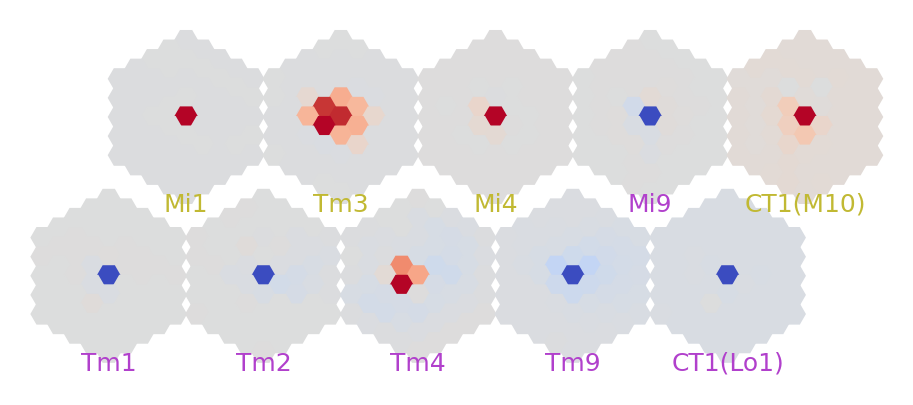

In [26]:
x, y = hex_rows(2, 5)
fig, axes, pos = plt_utils.ax_scatter(
    x, y, figsize=[3.5, 2], hpad=0, wpad=0.1, wspace=-0.5, hspace=-0.4
)

axes = np.array(axes).reshape(2, 5)

for i, row in enumerate(np.array(srf_cell_types).reshape(2, 5)):
    for j, cell_type in enumerate(row):
        crange = np.max(np.abs(mean_srfs[cell_type]))
        fig, ax, _ = plots.hex_scatter(
            dataset.dots.u,
            dataset.dots.v,
            mean_srfs[cell_type],
            cmap=plt.cm.coolwarm,
            vmin=-crange,
            vmax=crange,
            figsize=[3, 3],
            cbar=False,
            fig=fig,
            ax=axes[1 - i, j],
        )
        ax.set_xlabel(cell_type, fontsize=6, labelpad=-10)

for ax in axes.flatten():
    flash_response_color_labels(ax)

## e

In [27]:
from flyvis.datasets.dots import CentralImpulses

In [28]:
central_flash_and_resps = ensemble.central_impulses_responses()
central_flash_and_resps['responses'] = central_flash_and_resps['responses'] / norm

[2025-07-18 17:50:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:38] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:39] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f0f088213efd7ff1956bd3a9d31ccbf9/output.h5
[2025-07-18 17:50:39] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:39] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:40] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/fccc6fe364e46e11deccc4b13aae14b7/output.h5
[2025-07-18 17:50:40] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:40] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:41] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8220df68ff236346a7ec1c696434f9ea/output.h5
[2025-07-18 17:50:41] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:42] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:43] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/1b39c09a3c79a716baacf6703071066b/output.h5
[2025-07-18 17:50:43] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:43] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:44] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/09ab78724a8f4eb32ecbddc65c2e634f/output.h5
[2025-07-18 17:50:44] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:44] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:45] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8d5a4cb0595917c232e26b5e2dcef375/output.h5
[2025-07-18 17:50:45] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:45] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:46] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/36ce4d2447643f313041bd8fd6233ff1/output.h5
[2025-07-18 17:50:46] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:47] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:47] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/007/__cache__/flyvis/analysis/stimulus_responses/compute_responses/222ab067a424516851b07979297e81fd/output.h5
[2025-07-18 17:50:47] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:48] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:49] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/008/__cache__/flyvis/analysis/stimulus_responses/compute_responses/80a034c4b3b3c12ddd4e3601339fe82f/output.h5
[2025-07-18 17:50:49] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:49] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:50] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/009/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8436010559600981d405643351431f89/output.h5
[2025-07-18 17:50:50] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:50] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:51] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/010/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2701247b420f20ddaee726e94b353e4c/output.h5
[2025-07-18 17:50:51] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:51] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:52] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/011/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3f4212e139e31ba2fd756758109d7fda/output.h5
[2025-07-18 17:50:52] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:52] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:53] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/012/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5557f4d325982afb51ba0047b7a2d7a3/output.h5
[2025-07-18 17:50:53] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:54] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:54] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/013/__cache__/flyvis/analysis/stimulus_responses/compute_responses/90aec2ecf9151844ddf31d267e277b8a/output.h5
[2025-07-18 17:50:54] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:55] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:56] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/014/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f94f139f34576f79c6fb060320f8e06c/output.h5
[2025-07-18 17:50:56] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:56] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:57] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/015/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3681bcae96fdecfcc062e87e4da3eb74/output.h5
[2025-07-18 17:50:57] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:57] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:58] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/016/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e03284d0221ab0cd28d5e3064e595d08/output.h5
[2025-07-18 17:50:58] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:58] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:50:59] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/017/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a3f2a6c3896f8354334e2b35896e393c/output.h5
[2025-07-18 17:50:59] chkpt_utils:36 Recovered network state.
[2025-07-18 17:50:59] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:00] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/018/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2a04a613521a444c96c106938a2c6f73/output.h5
[2025-07-18 17:51:00] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:00] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:01] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/019/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6ccd9274604b62110bd1b416c37019f6/output.h5
[2025-07-18 17:51:01] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:02] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:04] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/020/__cache__/flyvis/analysis/stimulus_responses/compute_responses/490f98b1b63b37ae8c7d2f836382d32f/output.h5
[2025-07-18 17:51:04] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:06] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:07] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/021/__cache__/flyvis/analysis/stimulus_responses/compute_responses/a6629aa61d6b130453cb6ffff6974614/output.h5
[2025-07-18 17:51:07] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:08] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:08] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/022/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ecd83cfd3de9b9413113ea1b1c3232f3/output.h5
[2025-07-18 17:51:08] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:09] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:10] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/023/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b54ac6add068d04464c461dabee1cfb8/output.h5
[2025-07-18 17:51:10] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:10] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:11] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/024/__cache__/flyvis/analysis/stimulus_responses/compute_responses/11fb31ce4977add3d9b84157425e698f/output.h5
[2025-07-18 17:51:11] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:11] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:12] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/025/__cache__/flyvis/analysis/stimulus_responses/compute_responses/97b50bb9a50146a7fd042f276121eafa/output.h5
[2025-07-18 17:51:12] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:12] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:13] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/026/__cache__/flyvis/analysis/stimulus_responses/compute_responses/0a148f5010c0648054b8e14e9339336e/output.h5
[2025-07-18 17:51:13] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:13] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:14] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/027/__cache__/flyvis/analysis/stimulus_responses/compute_responses/751b86788ac7063ae7b79c252f46e7d8/output.h5
[2025-07-18 17:51:14] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:15] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:15] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/028/__cache__/flyvis/analysis/stimulus_responses/compute_responses/63d2308e83973da9514b8abeba0989e6/output.h5
[2025-07-18 17:51:15] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:16] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:17] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/029/__cache__/flyvis/analysis/stimulus_responses/compute_responses/2b96df1dc7fdde79f8ab9891f97197d0/output.h5
[2025-07-18 17:51:17] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:17] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:18] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/030/__cache__/flyvis/analysis/stimulus_responses/compute_responses/d8f2e0be5ad91bd17e4b75edacde7c16/output.h5
[2025-07-18 17:51:18] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:18] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:19] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/031/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7c0b5faefc4525cb836b9393de9e81e1/output.h5
[2025-07-18 17:51:19] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:19] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:20] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/032/__cache__/flyvis/analysis/stimulus_responses/compute_responses/392aaddf122e130fce563fac5f46f21e/output.h5
[2025-07-18 17:51:20] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:20] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:21] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/033/__cache__/flyvis/analysis/stimulus_responses/compute_responses/280d91df123bba4644c29dcc9f56d3cc/output.h5
[2025-07-18 17:51:21] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:22] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:23] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/034/__cache__/flyvis/analysis/stimulus_responses/compute_responses/00edd627beef7c9ce5685fee2d798d7b/output.h5
[2025-07-18 17:51:23] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:23] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:24] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/035/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3bd038d75840e398c61271e7e593f5de/output.h5
[2025-07-18 17:51:24] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:25] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:27] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/036/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ca9d22cddc08613fba78ca41255f91c1/output.h5
[2025-07-18 17:51:27] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:28] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:29] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/037/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f6ddf0f59bbc97fd02a8854ce62df1fd/output.h5
[2025-07-18 17:51:29] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:29] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:30] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/038/__cache__/flyvis/analysis/stimulus_responses/compute_responses/43741ad20e86b32d4339afee366fd4bd/output.h5
[2025-07-18 17:51:30] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:30] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:31] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/039/__cache__/flyvis/analysis/stimulus_responses/compute_responses/c4095d457b7ae568772819acd077b154/output.h5
[2025-07-18 17:51:31] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:31] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:32] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/040/__cache__/flyvis/analysis/stimulus_responses/compute_responses/259829ebc8595a72ddb7e4a960922cd6/output.h5
[2025-07-18 17:51:32] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:32] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:33] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/041/__cache__/flyvis/analysis/stimulus_responses/compute_responses/eccb9085618080ddb6e5e734ee5bcaab/output.h5
[2025-07-18 17:51:33] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:33] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:34] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/042/__cache__/flyvis/analysis/stimulus_responses/compute_responses/0f5f6f7a78849b4281909186c70697bb/output.h5
[2025-07-18 17:51:34] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:35] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:35] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/043/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8acb817e89e647027ec17fa0b67d55c3/output.h5
[2025-07-18 17:51:36] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:36] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:37] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/044/__cache__/flyvis/analysis/stimulus_responses/compute_responses/86d60ee60d1b5f5918a0d9e65866ac06/output.h5
[2025-07-18 17:51:37] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:37] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:38] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/045/__cache__/flyvis/analysis/stimulus_responses/compute_responses/51e9dc029517245c8b33b5116be09c4e/output.h5
[2025-07-18 17:51:38] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:38] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:39] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/046/__cache__/flyvis/analysis/stimulus_responses/compute_responses/82af64312bb5f39edb32202a3c4fb4a0/output.h5
[2025-07-18 17:51:39] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:40] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:40] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/047/__cache__/flyvis/analysis/stimulus_responses/compute_responses/8ea53a9ad1162562b9fcd26eaaa38991/output.h5
[2025-07-18 17:51:41] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:41] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:42] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/048/__cache__/flyvis/analysis/stimulus_responses/compute_responses/dd8808f272b1545e7e26e3e7acd24fbb/output.h5
[2025-07-18 17:51:42] chkpt_utils:36 Recovered network state.
[2025-07-18 17:51:42] network:757 Computing 12 stimulus responses.


Batch:   0%|          | 0/3 [00:00<?, ?it/s]

[2025-07-18 17:51:43] xarray_joblib_backend:56 Store item /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/049/__cache__/flyvis/analysis/stimulus_responses/compute_responses/369e18cbbe90ff217db290ce505473c2/output.h5


In [29]:
dataset = CentralImpulses(**central_flash_and_resps.attrs['config'])

In [30]:
trf_cell_types = np.array([
    "Mi1",
    "Tm3",
    "Mi4",
    "Mi9",
    "CT1(M10)",
    "Tm1",
    "Tm2",
    "Tm4",
    "Tm9",
    "CT1(Lo1)",
    "L1",
    "L2",
    "L3",
    "L4",
    "L5",
]).reshape(5, 3, order="F")

In [31]:
durations = [0.02, 0.05, 0.1, 0.2, 0.3]
on_cmap = plt_utils.truncate_colormap(plt.cm.Blues_r, minval=0.0, maxval=0.4).resampled(
    len(durations)
)
off_cmap = plt_utils.truncate_colormap(plt.cm.Blues_r, minval=0.5, maxval=0.9).resampled(
    len(durations)
)
cmaps = {
    1.0: [on_cmap(i) for i in range(on_cmap.N)][::-1],
    0: [off_cmap(i) for i in range(off_cmap.N)][::-1],
}

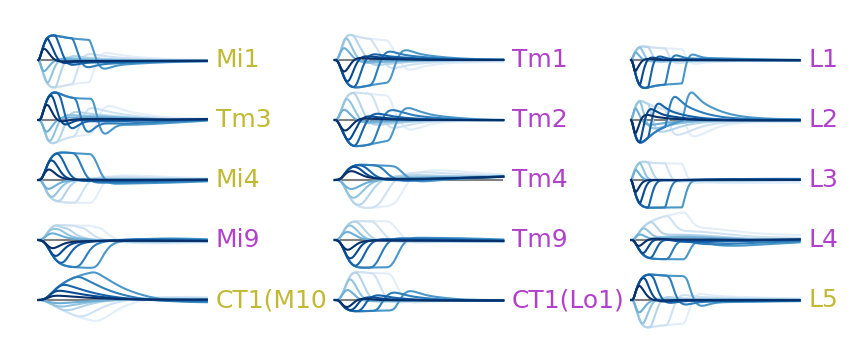

In [32]:
fig, axes = fit_panel_size(
    5,
    3,
    max_figure_height_cm=5.35,
    max_figure_width_cm=8,
    panel_width_cm=8 / 3,
    panel_height_cm=5.35 / 10,
).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True)
for i, row in enumerate(trf_cell_types):
    for j, cell_type in enumerate(row):
        ax = axes[i, j]
        for q, duration in enumerate(durations[::-1]):
            for intensity in [0, 1]:
                color = cmaps[intensity][
                    q
                ]  # plt.cm.Blues(256) if intensity == 1 else plt.cm.Blues(128)
                #                 linestyle = "solid" if intensity == 1 else "dashed"
                zorder = 1 if intensity == 1 else 0

                r = (
                    central_flash_and_resps['responses']
                    .sel(network_id=cluster_indices[cell_type][0])
                    .custom.where(
                        time=">=0,<1.0",
                        cell_type=cell_type,
                        intensity=intensity,
                        t_impulse=duration,
                    )
                    .mean("network_id")
                )
                # subtract baseline after model averaging to plot it centered
                mean = (r - r.isel(frame=0).values).squeeze()
                ax.plot(r.time, mean, linewidth=0.5, color=color, zorder=zorder)
        ax.hlines(
            mean[0],
            r.time.min(),
            r.time.max(),
            linewidth=0.5,
            color="0.5",
            zorder=-1,
        )

        plt_utils.rm_spines(ax)
        ax.yaxis.set_label_position("right")
        ax.set_ylabel(
            cell_type,
            fontsize=6,
            rotation=0,
            ha="left",
            va="center",
            labelpad=0.1,
        )
        #         ylim = np.array)
        ylim = np.array(ax.get_ylim())
        ylim = (-max(abs(ylim)), max(abs(ylim)))
        ax.set_ylim(ylim)

for ax in axes.flatten():
    flash_response_color_labels(ax)

stimulus

(-1.05, 1.05)

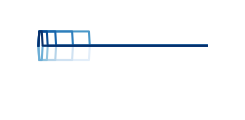

In [33]:
fig, axes = fit_panel_size(
    5,
    3,
    max_figure_height_cm=5.35,
    max_figure_width_cm=8,
    panel_width_cm=8 / 3,
    panel_height_cm=5.35 / 10,
).axis_grid(wspace=0.6, hspace=0.0, as_matrix=True, unmask_n=1)
ax = axes[0, 0]
for j, duration in enumerate(durations[::-1]):
    for intensity in [0, 1]:
        color = cmaps[intensity][j]
        #                 linestyle = "solid" if intensity == 1 else "dashed"
        zorder = 1 if intensity == 1 else 0
        stim = (
            central_flash_and_resps['stimulus']
            .custom.where(
                time=f">=-{2 * central_flash_and_resps.attrs['config']['dt']},<1.0",
                intensity=intensity,
                t_impulse=duration,
                u_in=0,
                v_in=0,
            )
            .squeeze()
        )
        ax.plot(stim, linewidth=0.5, color=color, zorder=zorder)
ax.hlines(
    0,
    stim.time.min(),
    stim.time.max(),
    linewidth=0.5,
    color="0.5",
    zorder=-1,
)

plt_utils.rm_spines(ax)

ylim = np.array(ax.get_ylim())
ylim = (-max(abs(ylim)), max(abs(ylim)))
ax.set_ylim(ylim)

## Extended Data Fig. 9

### T4c

In [34]:
strfs = (
    flashes_and_resps['responses']
    .sel(network_id=cluster_indices["T4c"][0])
    .custom.where(t_impulse=0.02, cell_type="T4c", time=">=0,<0.25", intensity=1)
    .mean("network_id")
)

In [35]:
strfs = (strfs - strfs.isel(frame=0).mean().values).squeeze()

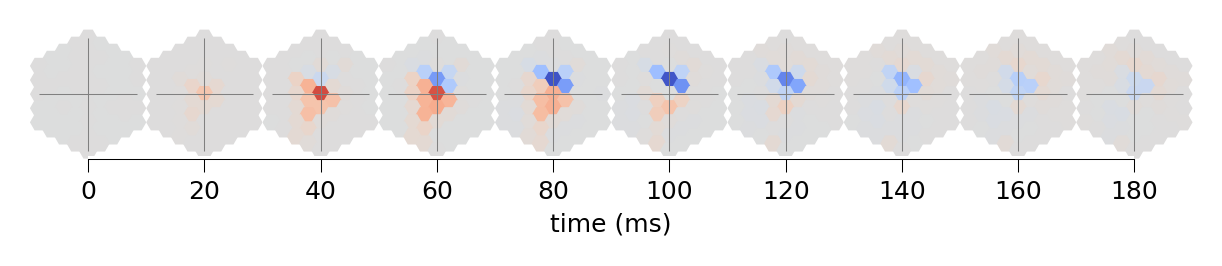

In [36]:
fig, axes = plot_strf(strfs.time, strfs.values.T)

### T5c

In [37]:
strfs = (
    flashes_and_resps['responses']
    .sel(network_id=cluster_indices["T5c"][0])
    .custom.where(t_impulse=0.02, cell_type="T5c", time=">=0,<0.25", intensity=1)
    .mean("network_id")
)

In [38]:
strfs = (strfs - strfs.isel(frame=0).mean().values).squeeze()

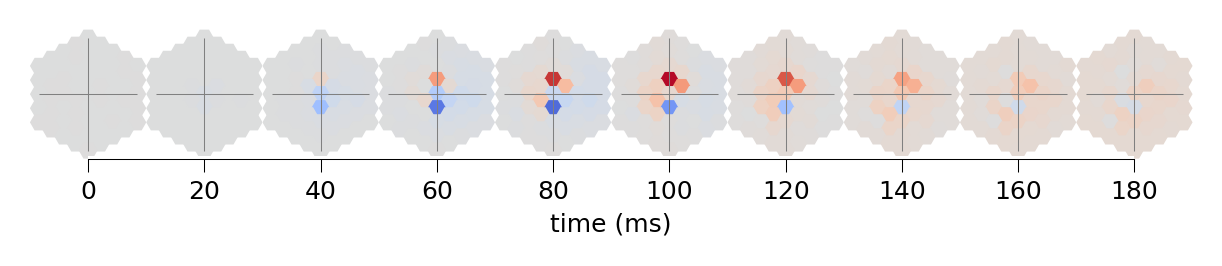

In [39]:
fig, axes = plot_strf(strfs.time, strfs.values.T)

## f

In [40]:
from flyvis.analysis.optimal_stimuli import plot_stim_response

In [41]:
network_view = ensemble[0]

In [42]:
optstims = network_view.optimal_stimulus_responses("T4c")

[2025-07-18 17:51:58] network_view:122 Initialized network view at /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000
[2025-07-18 17:51:58] sintel_utils:331 Found Sintel at /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/SintelDataSet
[2025-07-18 17:51:59] logging_utils:23 epe not in /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/validation, but 'loss' is. Falling back to 'loss'. You can rerun the ensemble validation to make appropriate recordings of the losses.
[2025-07-18 17:52:02] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2025-07-18 17:52:02] chkpt_utils:36 Recovered network state.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec002177245ed30fe68c68017bbc5281/output.h5


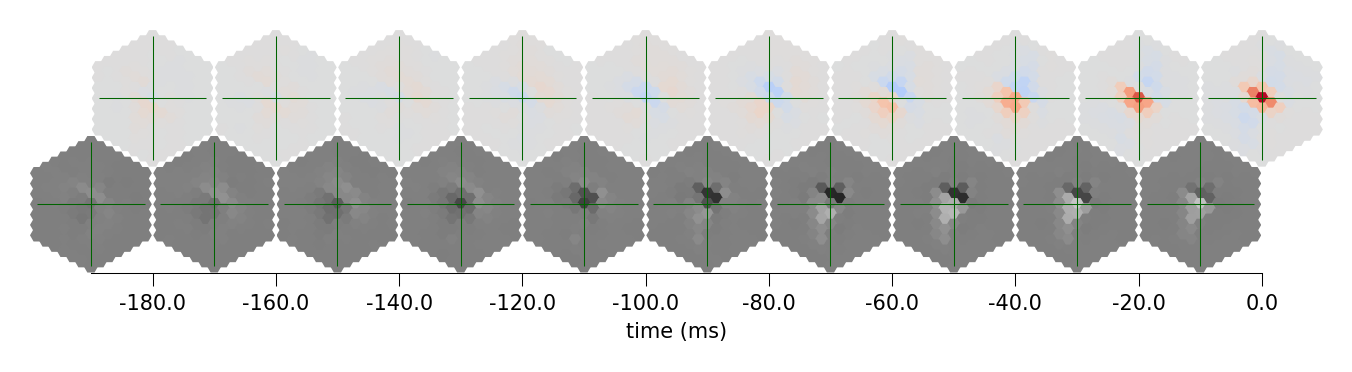

In [43]:
stim_resp_plot = plot_stim_response(
    optstims.regularized_stimulus,
    optstims.response,
    1 / 100,
    *network_view.get_uv("T4c"),
    figsize=[5, 1.6],
    ylabel=None,
    label_peak_response=False,
)

In [44]:
optstims = network_view.optimal_stimulus_responses("T5c")

[2025-07-18 17:52:17] network_view:122 Initialized network view at /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000
[2025-07-18 17:52:17] sintel_utils:331 Found Sintel at /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/SintelDataSet
[2025-07-18 17:52:22] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2025-07-18 17:52:22] chkpt_utils:36 Recovered network state.


/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec002177245ed30fe68c68017bbc5281/output.h5


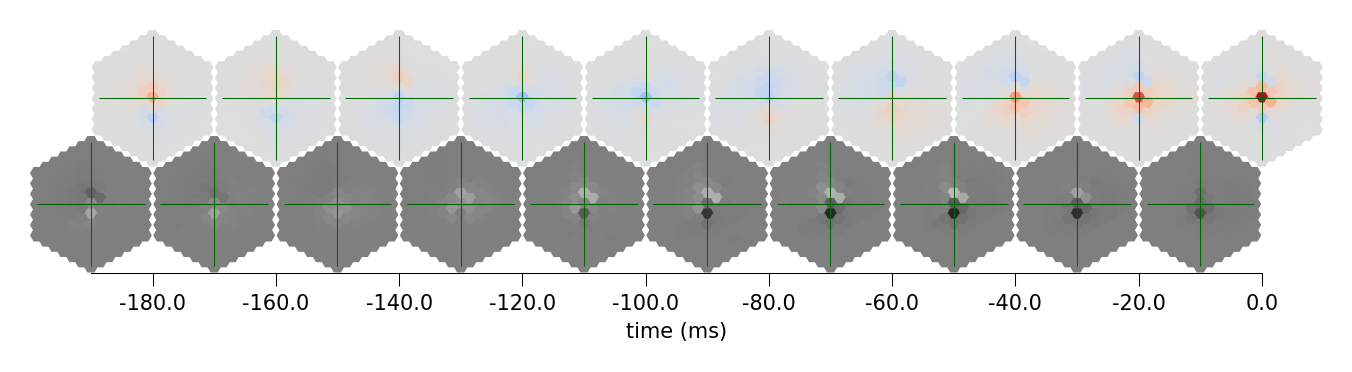

In [45]:
stim_resp_plot = plot_stim_response(
    optstims.regularized_stimulus,
    optstims.response,
    1 / 100,
    *network_view.get_uv("T5c"),
    figsize=[5, 1.6],
    ylabel=None,
    label_peak_response=False,
)